# ML Algorithm Insight Series
## Module: Dimensionality Reduction (PCA, t-SNE, LDA)

### 1. Introduction & Intuition

Dimensionality reduction techniques help simplify datasets by reducing the number of input variables while retaining meaningful structure. This enables visualization, noise reduction, and performance improvement in downstream models.

Think of it as compressing a high-resolution image into a lower resolution that still preserves the essential patterns.


### 2. How the Algorithm Works

**PCA (Principal Component Analysis)**:
- Linearly transforms features into uncorrelated components
- Maximizes variance along orthogonal axes
- Projects data into top-k principal components

PCA transformation:
\[
Z = XW
\]
Where \( W \) contains the top eigenvectors of the covariance matrix.

**t-SNE (t-distributed Stochastic Neighbor Embedding)**:
- Non-linear method
- Preserves local structure in lower dimensions
- Uses probabilistic distances and Kullback-Leibler divergence

**LDA (Linear Discriminant Analysis)**:
- Supervised method
- Projects data to maximize class separability
- Optimizes ratio of between-class to within-class scatter


### 3. Data and Preparation Insights

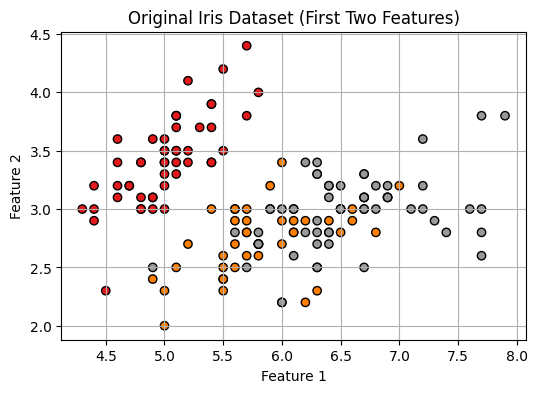

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', edgecolor='k')
plt.title("Original Iris Dataset (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

Center and scale features before applying PCA or t-SNE. LDA requires class labels.

### 4. Implementation Highlights

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

/Users/jasonrobinson/my-data-science-journey-3/ds_journey_env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


### 5. Insightful Visualization

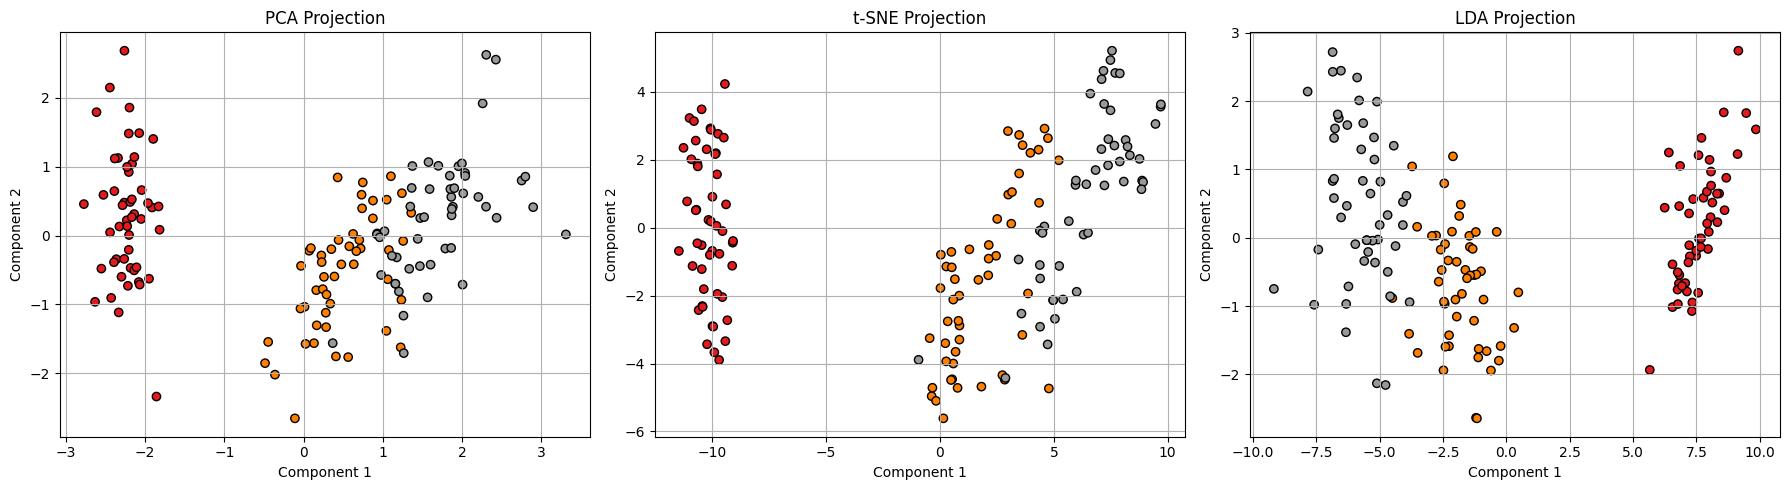

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set1', edgecolor='k')
axs[0].set_title("PCA Projection")

axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Set1', edgecolor='k')
axs[1].set_title("t-SNE Projection")

axs[2].scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='Set1', edgecolor='k')
axs[2].set_title("LDA Projection")

for ax in axs:
    ax.grid(True)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")

plt.tight_layout()
plt.show()

Visualizations help assess how well different methods separate or group data.

### 6. Algorithm Evaluation

In [4]:
print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

PCA Explained Variance Ratio: [0.72962445 0.22850762]


### 7. Pros, Cons, and Techniques

**PCA**
- Pros: Fast, interpretable, useful for compression
- Cons: Linear, may not capture complex patterns

**t-SNE**
- Pros: Excellent for visualizing clusters
- Cons: Non-deterministic, not scalable for large data

**LDA**
- Pros: Uses label info, good for class separation
- Cons: Limited to supervised problems, assumes normality

**Techniques**:
- Use PCA for pre-processing before clustering
- Apply t-SNE only for visualization, not modeling
- Normalize inputs and reduce noise before reduction


### 8. Further Explorations

- TODO: Experiment with more components in PCA
- TODO: Tune perplexity in t-SNE
- TODO: Compare PCA with UMAP for non-linear reduction


### 9. Summary & Resources

**Key Insights:**
- Dimensionality reduction simplifies data without losing essential structure.
- PCA and LDA rely on linear assumptions, while t-SNE captures non-linear geometry.
- Visualization aids in cluster detection and preprocessing analysis.

**Further Reading:**
- “Pattern Recognition and Machine Learning” – Bishop
- Scikit-learn Documentation: PCA, t-SNE, LDA
- van der Maaten & Hinton (2008) – t-SNE

**Notebook Repo**: (add your GitHub link)  
**Companion Article**: (add Medium/Substack link)
